# R laboratory 05
## Lorenzo Valentini

In [1]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

### Exercise 1
    The number of particles emitted by a radioactive source during a fixed interval of time (∆t =10 s) follows a Poisson distribution on the parameter µ. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3.

    (a) suppose a uniform prior distribution for the parameter µ
    - determine and draw the posterior distribution for µ, given the data
    - evaluate mean, median and variance, both analytically and numerically in R

    (b) suppose a Jeffrey’s prior for the parameter µ
    - determine and draw the posterior distribution for µ, given the data
    - evaluate mean, median and variance, both analytically and numerically in R

    (c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.

A uniform/Jeffrey prior, with a poissonian likelihood, gives a gamma posterior with the parameters calculated as done below.


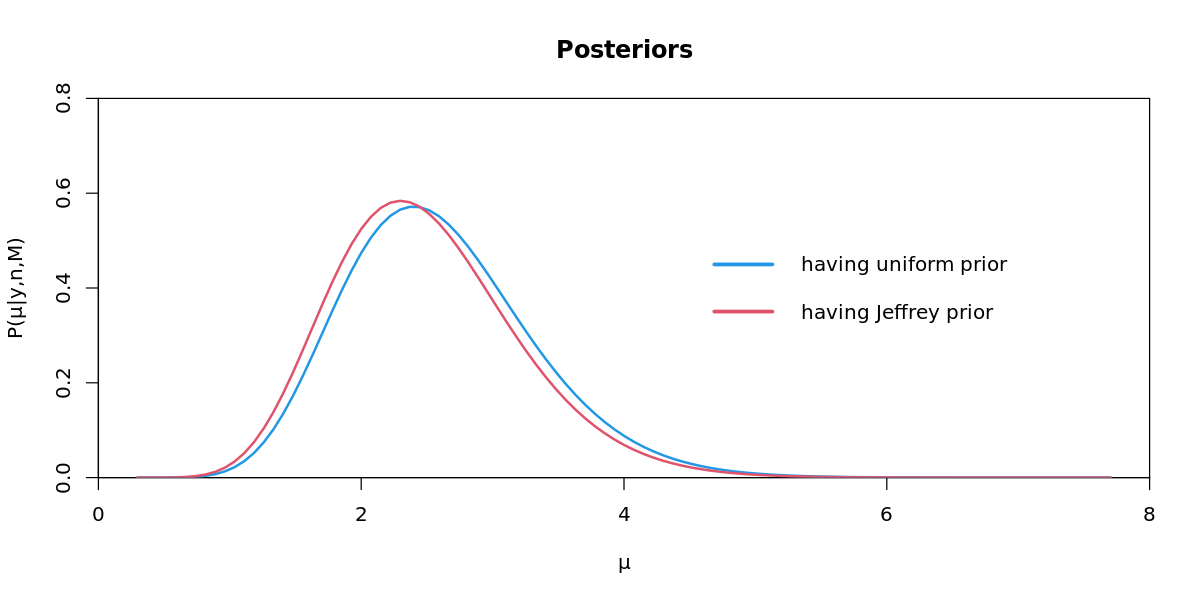

In [2]:
particle_counts <- c(4, 1, 3, 1, 3)
dt <- 10
l <- length(particle_counts)
a_u <- 1 + sum(particle_counts)
a_j <- 0.5 + sum(particle_counts)

posterior_uniform <- function(x) {
    posterior_uniform <- dgamma(x, shape = a_u, rate = l)
    return(posterior_uniform)
}
posterior_jeffrey <- function(x) {
    posterior_jeffrey <- dgamma(x, shape= a_j, rate = l)
    return(posterior_jeffrey)
}

fig(10, 5)
plot(0, 0, "n", xlim = c(0, 8), ylim = c(0, 0.8), ,xaxs = 'i', yaxs = 'i', main = "Posteriors", xlab = "µ", ylab = "P(µ|y,n,M)")
curve(posterior_uniform(x), col = 4, lty = 1, lwd = 2, add = TRUE)
curve(posterior_jeffrey(x), col = 2, lty = 1, lwd = 2, add = TRUE)
legend("right", legend = c("having uniform prior", "having Jeffrey prior"), bty = "n", lty = c(1, 1), lwd = c(3, 3), col = c(4, 2), y.intersp = 3)


In [3]:
dx <- 0.1
steps <- seq(0, 10, dx)

# Analytical values
mean_u_a = a_u/l
mode_u_a = (a_u - 1)/l
# median_u_a is not analitically obtainable
variance_u_a = a_u/l**2

mean_j_a = a_j/l
mode_j_a = (a_j - 1)/l
# median_j_a is not analitically obtainable
variance_j_a = a_j/l**2

# Numerical values
mean_u_n = sum(posterior_uniform(steps)*steps*dx)
mode_u_n = optimize(posterior_uniform, interval = c(0, 8), maximum = TRUE)$maximum
median_u_n = qgamma(0.5, shape= a_u, rate = l)   
variance_u_n = sum(posterior_uniform(steps)*steps**2*dx) - mean_u_n**2

mean_j_n = sum(posterior_jeffrey(steps)*steps*dx)
mode_j_n = optimize(posterior_jeffrey, interval = c(0, 8), maximum = TRUE)$maximum
median_j_n = qgamma(0.5, shape= a_j, rate = l)   
variance_j_n = sum(posterior_jeffrey(steps)*steps**2*dx) - mean_j_n**2

#Print
cat("Prior\t\t\tUniform prior\t\t\t|\t\tJeffrey prior\n")
cat("------------------------------------------------------- + ---------------------------------------\n")
cat("Method\t\tAnalytical\t|\tNumerical\t|\tAnalytical\t|\tNumerical\t\n")
cat("\t\t\t\t|\t\t\t|\t\t\t|\t\t\t\n")
cat(sprintf("Mean\t\t%.3f\t\t|", mean_u_a), sprintf("\t%.3f\t\t|", mean_u_n), sprintf("\t%.3f\t\t|", mean_j_a), sprintf("\t%.3f\t\t\n", mean_j_n))
cat("\t\t\t\t|\t\t\t|\t\t\t|\t\t\t\n")
cat(sprintf("Mode\t\t%.3f\t\t|", mode_u_a), sprintf("\t%.3f\t\t|", mode_u_n), sprintf("\t%.3f\t\t|", mode_j_a), sprintf("\t%.3f\t\t\n", mode_j_n))
cat("\t\t\t\t|\t\t\t|\t\t\t|\t\t\t\n")
cat(sprintf("Median\t\t-\t\t|"), sprintf("\t%.3f\t\t|", median_u_n), sprintf("\t-\t\t|"), sprintf("\t%.3f\t\t\n", median_j_n))
cat("\t\t\t\t|\t\t\t|\t\t\t|\t\t\t\n")
cat(sprintf("Variance\t%.3f\t\t|", variance_u_a), sprintf("\t%.3f\t\t|", variance_u_n), sprintf("\t%.3f\t\t|", variance_j_a), sprintf("\t%.3f\t\t\n", variance_j_n))


Prior			Uniform prior			|		Jeffrey prior
------------------------------------------------------- + ---------------------------------------
Method		Analytical	|	Numerical	|	Analytical	|	Numerical	
				|			|			|			
Mean		2.600		| 	2.600		| 	2.500		| 	2.500		
				|			|			|			
Mode		2.400		| 	2.400		| 	2.300		| 	2.300		
				|			|			|			
Median		-		| 	2.534		| 	-		| 	2.434		
				|			|			|			
Variance	0.520		| 	0.520		| 	0.500		| 	0.500		


From the parameters, 

In [4]:
ci <- 0.95
left_border <- (1 - ci)/2
right_border <- 1 - left_border

#Uniform prior
ci_left_u = qgamma(left_border, shape = a_u, rate = l)
ci_right_u = qgamma(right_border, shape = a_u, rate = l)

#Jeffreys prior
ci_left_j = qgamma(left_border, shape=a_j, rate = l)
ci_right_j = qgamma(right_border, shape = a_j, rate = l)

#Gaussian for u
gauss_u <- function(x){
    gauss_u <- dnorm(x, mean_u_n, sqrt(variance_u_n))
    return(gauss_u)
}
ci_left_g_u = qnorm(left_border, mean_u_n, sqrt(variance_u_n))
ci_right_g_u = qnorm(right_border, mean_u_n, sqrt(variance_u_n))

#Gaussian for J
gauss_j <- function(x){
    gauss_j <- dnorm(x, mean_j_n, sqrt(variance_j_n))
    return(gauss_j)
}
ci_left_g_j = qnorm(left_border, mean_j_n, sqrt(variance_j_n))
ci_right_g_j = qnorm(right_border, mean_j_n, sqrt(variance_j_n))

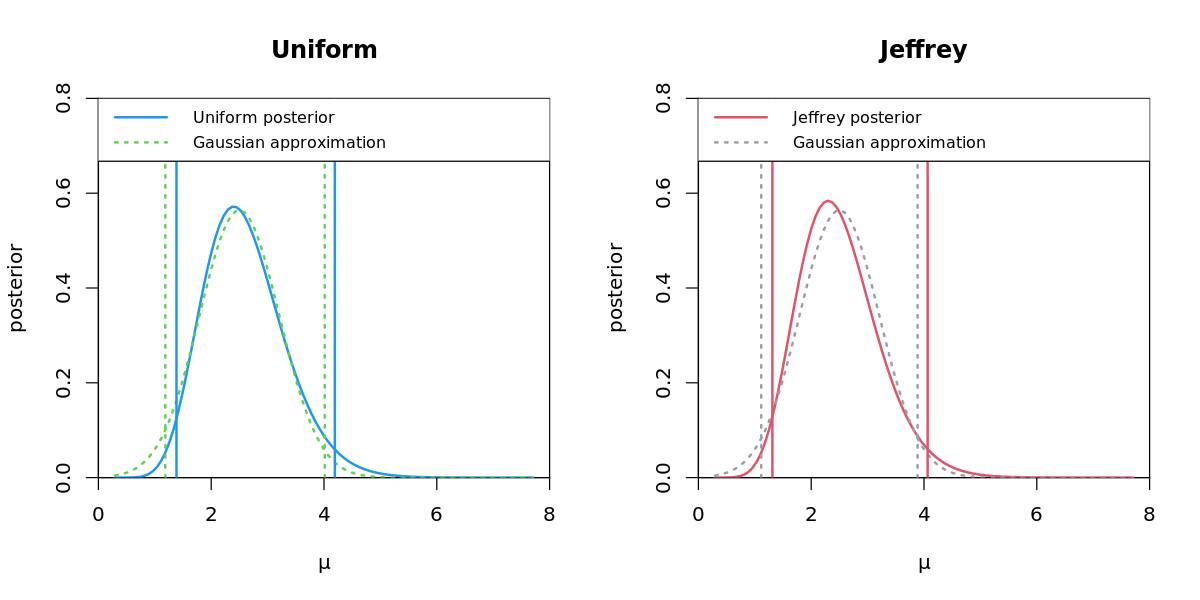

In [5]:
par(mfrow=c(1,2))

plot(0, 0, "n", xlim = c(0, 8), ylim = c(0, 0.8),xaxs = 'i', yaxs = 'i', main = "Uniform", xlab = "µ", ylab = "posterior")
curve(posterior_uniform(x), col = 4, lwd = 2, lty = 1, add = TRUE)
curve(gauss_j(x), col = 3, lwd = 2, lty = 3, add = TRUE)
abline(v = c(ci_left_u, ci_right_u), lty = 1, col = 4, lwd = 2)
abline(v = c(ci_left_g_u, ci_right_g_u), lty = 3, col = 3, lwd = 2)
legend("top", legend = c("Uniform posterior", "Gaussian approximation"), lty = c(1, 3), col = c(4, 3), lwd = c(2, 2), y.intersp = 2, cex = 0.8)
plot(0, 0, "n", xlim = c(0, 8), ylim = c(0, 0.8), xaxs = 'i', yaxs = 'i', main = "Jeffrey", xlab = "µ", ylab = "posterior")
curve(posterior_jeffrey(x), col = 2, lty = 1, lwd = 2, add = TRUE)
curve(gauss_j(x), col = 8, lty = 3, lwd = 2, add = TRUE)
abline(v = c(ci_left_j, ci_right_j),  lty=1, col = 2, lwd = 2)
abline(v = c(ci_left_g_j, ci_right_g_j), lty = 3, col = 8, lwd = 2)
legend("top", legend = c("Jeffrey posterior", "Gaussian approximation"), lty = c(1, 3), col = c(2, 8), lwd = c(2, 2), y.intersp = 2, cex = 0.8)

### Exercise 2
    Given the problem of the lightouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea (β) are unknown.

The lighthouse emits with uniform probability along $\theta$, indipendently by the values of $\alpha$ and $\beta$:

$\mathbb{P}(\theta|\alpha,\beta) = constant$.

The impact position of a impulse beam is $x = \alpha + \beta \tan \theta$. This causes the probability distribution along $x$ to be a Cauchy distribution:

$$\mathbb{P}(x|\alpha,\beta) = \mathbb{P}(\theta|\alpha,\beta) \left|\frac{\mathrm{d}\theta}{\mathrm{d}x}\right| = \frac{1}{\pi} \frac{\beta}{\beta^2 + (x-\alpha)^2} $$.

The likelihood is obtained doing the products of the probabilities of the single detections.

After obtaining the 2D posterior, it is convenient to choose the peak of the 2D distribution as our best estimate for $\alpha$ and $\beta$: values generated by chance close to the limit angles risk to make the average values not precise.


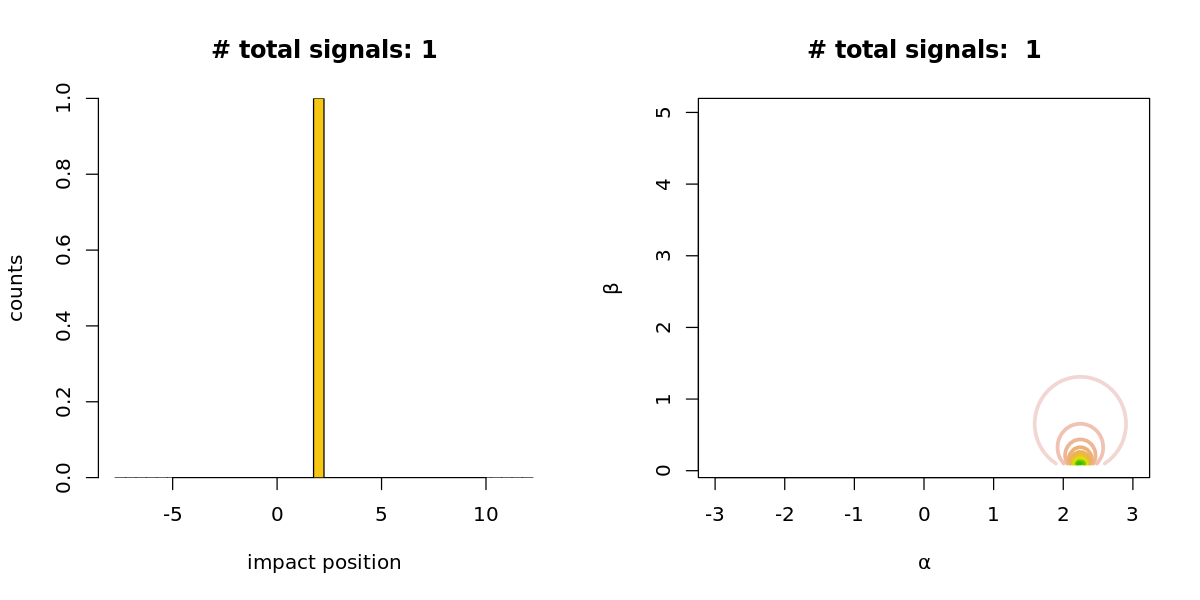

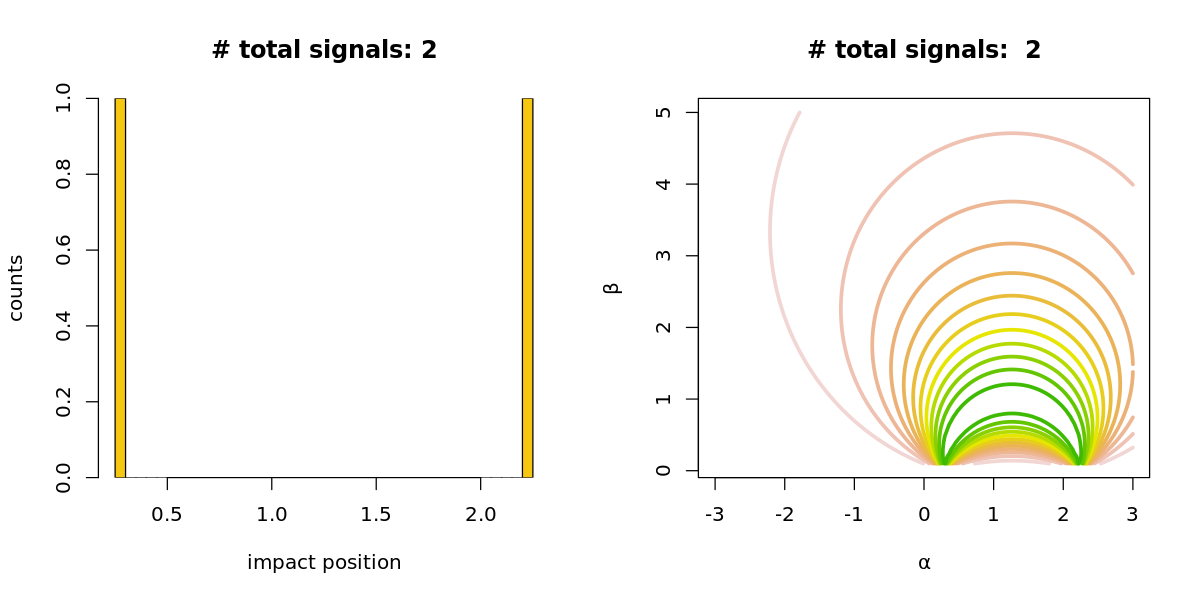

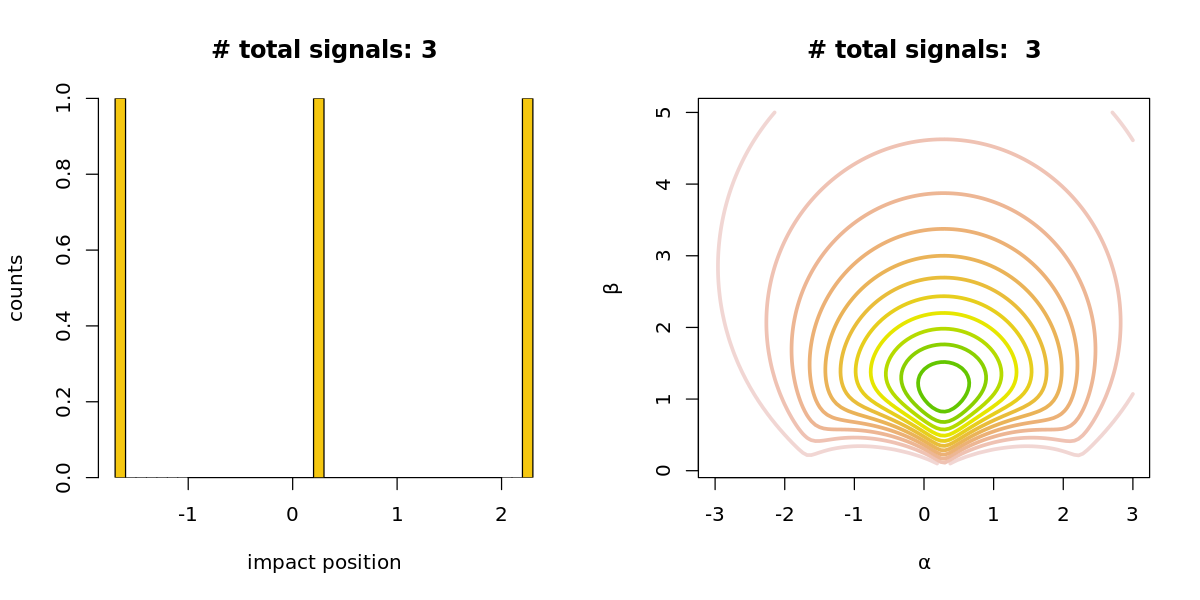

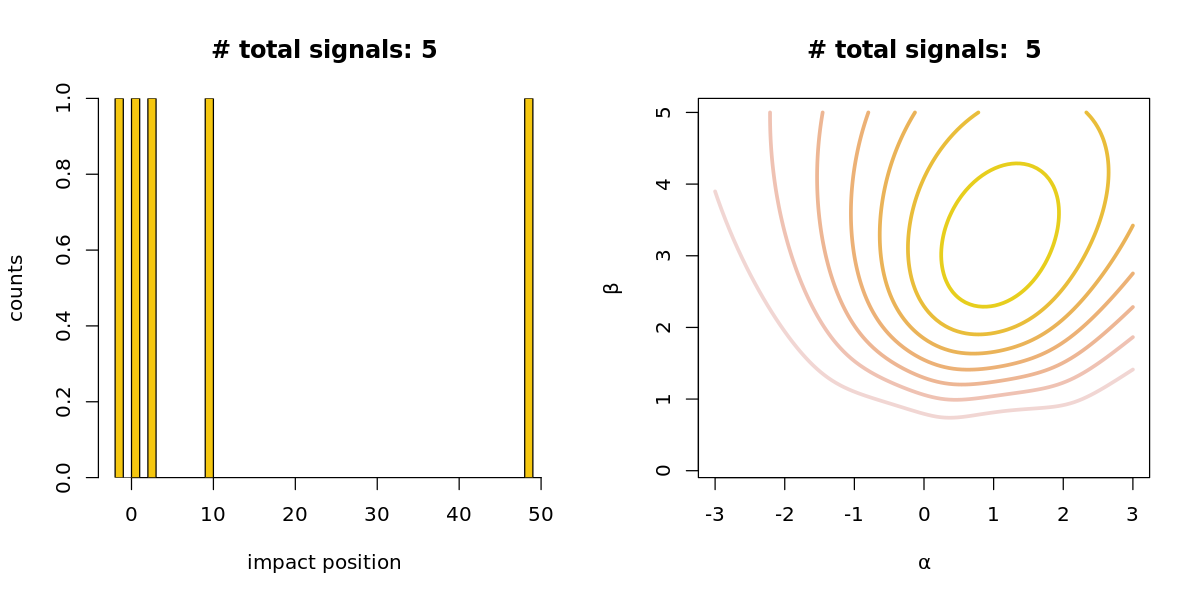

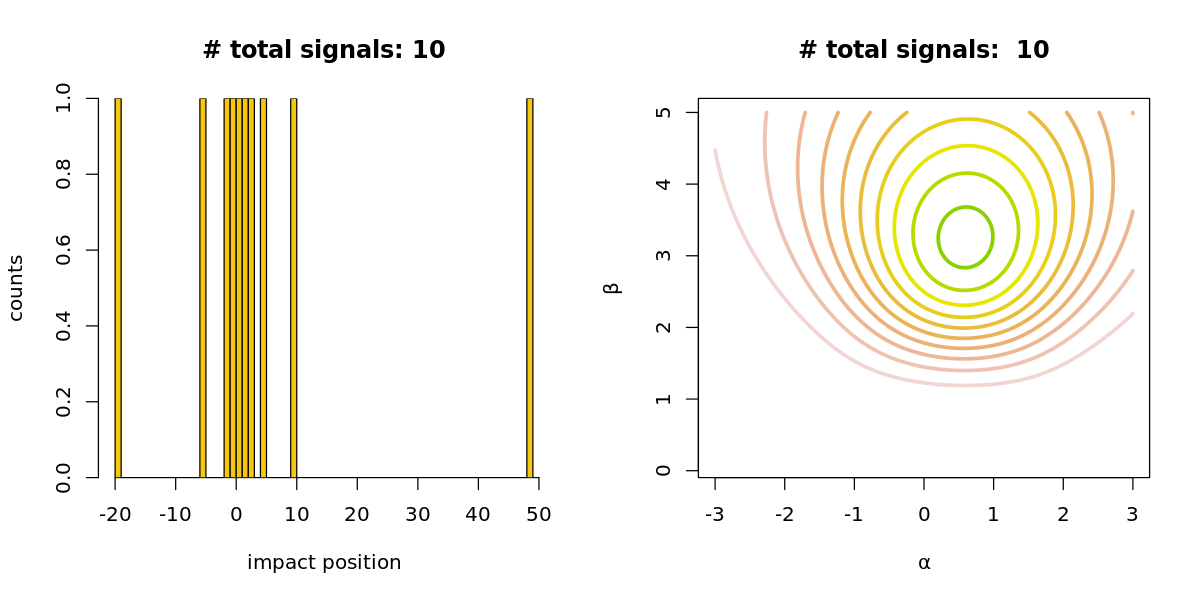

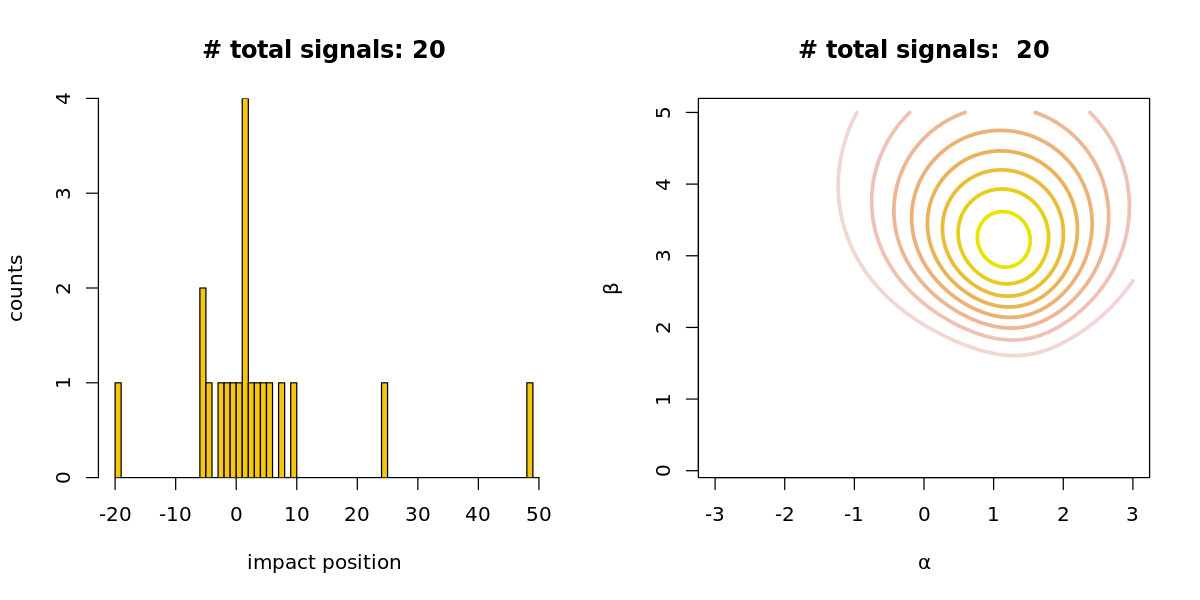

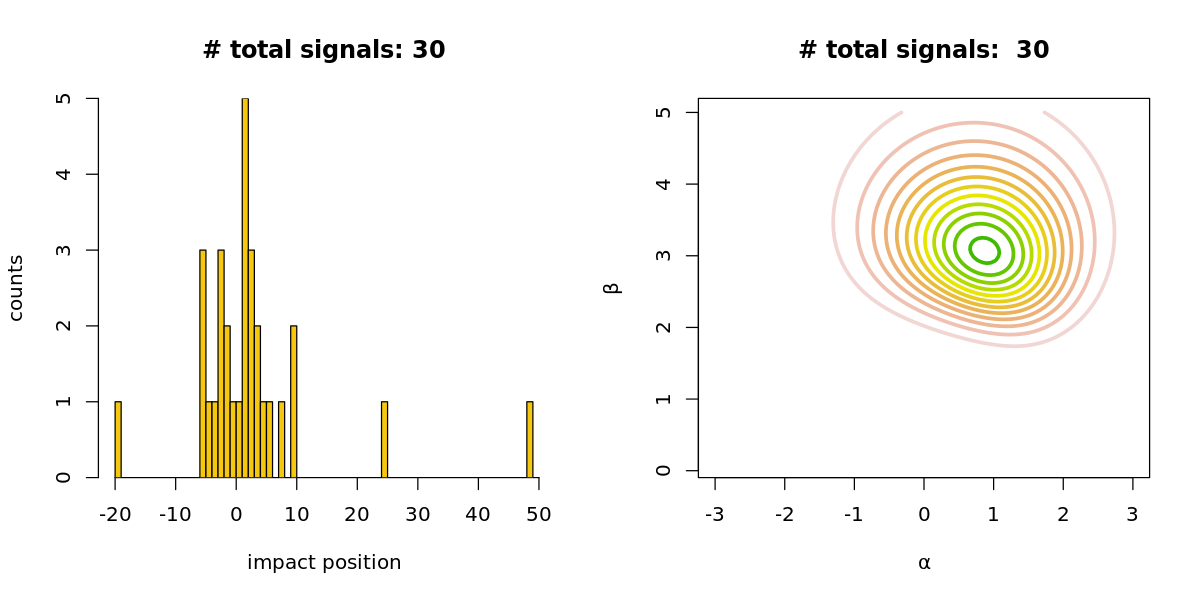

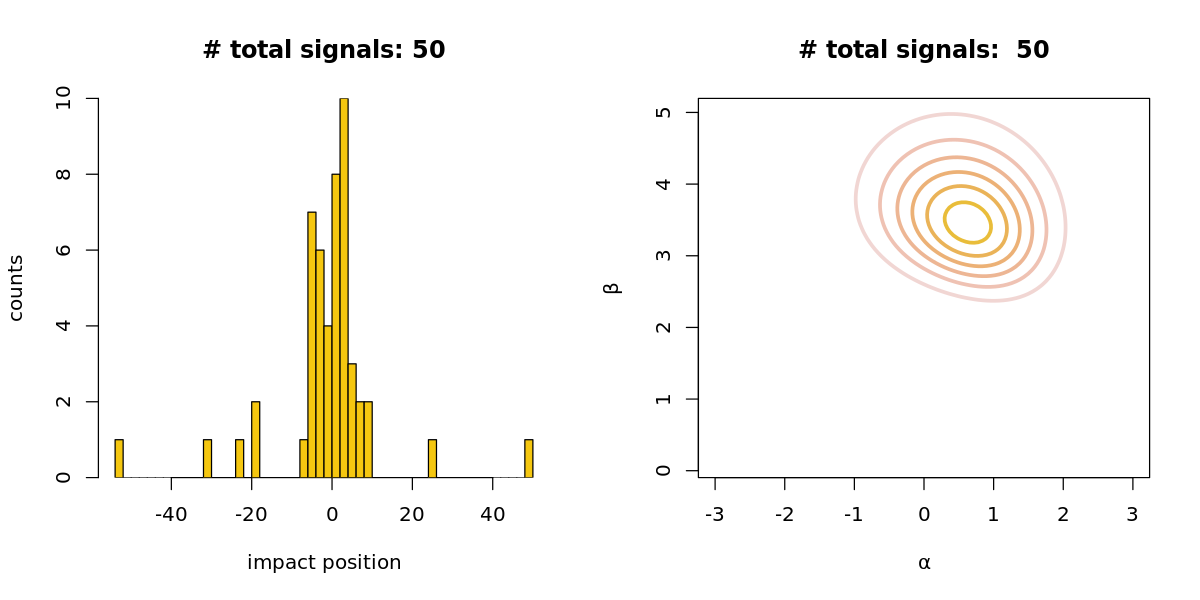

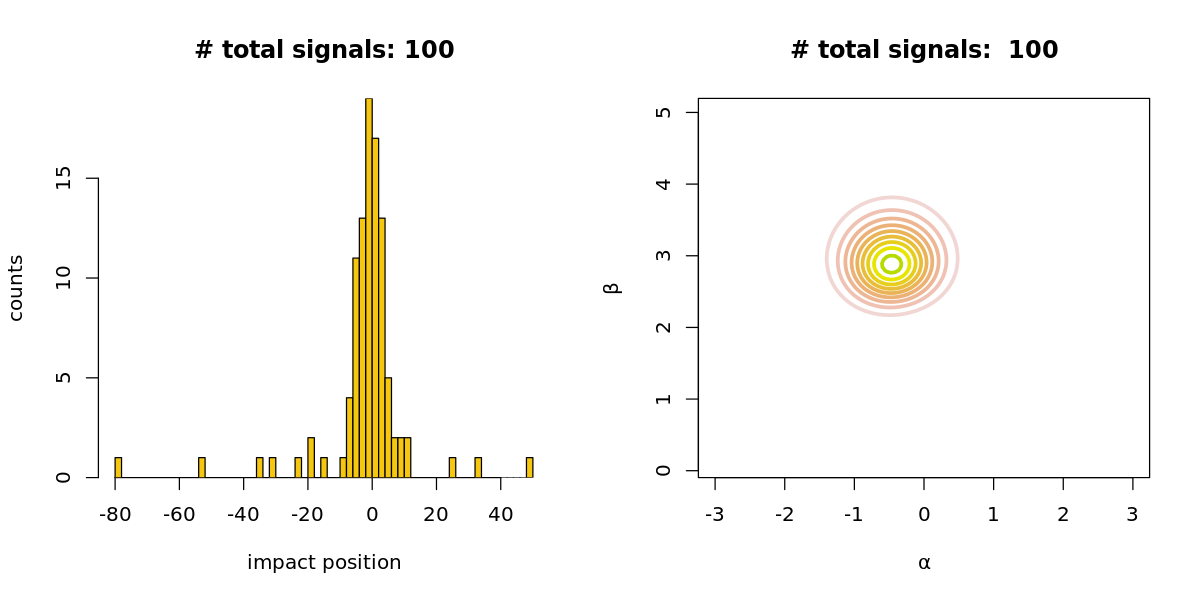

In [10]:
#Generate impulse beam distribution from the real values
alpha <- 0
beta <- 3
theta <- runif(200, -pi/2, pi/2)
xs <- alpha + beta * tan(theta)

#Build uniform priors spatial steps for both parameters
alpha_min <- -3; alpha_max <- 3
alphas <- 101
alpha_step <- (alpha_max - alpha_min) / alphas
alpha_seq <- seq(alpha_min, alpha_max, len = alphas)
alpha_prior <- 1 / (alpha_max - alpha_min)
beta_min <- 0.1; beta_max <- 5
betas <- 101
beta_step <- (beta_max - beta_min) / betas
beta_seq <- seq(beta_min, beta_max, len = betas)
beta_prior <- 1 / (beta_max - beta_min)

#Set parameters for the plot
observations <- c(1,2,3,5,10,20,30,50,100)
fig(10,5)
cols <- rev(terrain.colors(15))

#Calculate the probabilities and plot the complessive posteriors
for (n_observations in observations){
    detected_positions <- xs[1:n_observations]
    like_grid <- vector()

    for (a in alpha_seq){
        for (b in beta_seq){
            l <- sum(log(dcauchy(detected_positions, a, b)))
            like_grid <- cbind(like_grid, l)
        }
    }
    posterior_grid <- exp(like_grid)/(sum(exp(like_grid)) * alpha_step * beta_step)
    posterior_grid <- matrix(posterior_grid, nrow = alphas, byrow = TRUE)
    
    par(mfrow=c(1,2))
    ifelse(n_observations > 1,
        hist(detected_positions, yaxs = 'i', breaks = 50, col = 7, xlab = 'impact position', ylab = 'counts',
                    main = paste0('# total signals: ', n_observations)),
        hist(detected_positions, breaks=seq(detected_positions[1] - 10, detected_positions[1] + 10, 0.5),
                    col = 7, yaxs = 'i', xlab = 'impact position', ylab = 'counts',
                    main = paste0('# total signals: ',n_observations))
        )
    contour(alpha_seq, beta_seq, posterior_grid, plot.title = title(main = paste('# total signals: ', n_observations), 
                xlab = expression(alpha),  ylab = expression(beta)), 
                labels = NULL, col = cols, lty = 1, lwd = 3, drawlabels = FALSE)
}

### Exercise 3
    Given the Signal over Background example discussed last week, analyze and discuss the following cases.

    (a) Vary the sampling resolution of used to generate the data, keeping the same sampling range:
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w).

    Change the resolution w={0.1,0.25,1,2,3}.

    Check the effect on the results.

    (b) Change the ratioA/Bused to simulate the data (keeping both positive in accordance with the prior).
    
    Check the effect on the results.


The number $N$ of photons measured at specific positions follows the Poisson distribution:

$$P(N|S) = \frac{S^N e^{-S}}{N!} $$,

$$S = \Delta t \left[A \exp\left( - \frac{(x - x_0)^2}{2w^2} \right) + B\right]$$,

$\Delta t$ is the exposure time,

$x_0$ and $w$ are the centre and width of the signal peak,

$A$ and $B$ are the signal and background amplitudes. 


The likelihood of the data $D$ is:

$$P(D|A,B,M) = \prod_{j} \frac{S_k^{N_k} e^{-S_k}}{N_k!} $$.


If there is a uniform prior for $A, B > 0$, the posterior is:

$$ P(A, B|D,M) = \frac{1}{Z} \prod_j \frac{S_k^{N_k} e^{-S_k}}{N_k!} $$,

$Z$ is the normalization factor.

The log posterior is:

$$L = constant + \sum_k [N_k \log S_k - S_k] $$

In [11]:
w_resolutions <- c(0.1, 0.25, 1, 2, 3)
ratios <- c(1.5, 2, 3, 4)
fig(12, 4)

signal <- function (x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Log posterior
log.post <- function (d, x, a, b, x0, w, t) {
    if(a<0 || b <0) { return (-Inf )} # the effect of the prior
    sum( dpois(d, lambda = signal (x, a, b, x0, w_res, t), log=TRUE ))
}

Resolution:  0.1 	Signal/noise ratio:  2 
a = 	 2.103476 +/- 0.740592 
b = 	 1.050327 +/- 0.08659171 
rho = 	 -0.1064347 


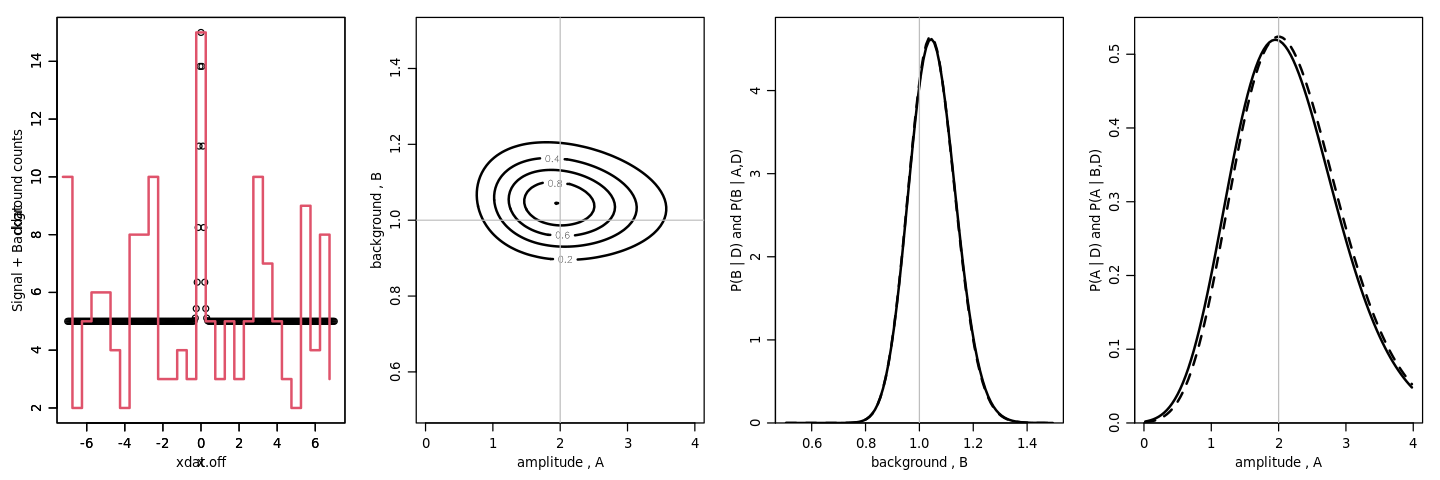

Resolution:  0.25 	Signal/noise ratio:  2 
a = 	 1.928256 +/- 0.7080523 
b = 	 1.052814 +/- 0.08780667 
rho = 	 -0.1590094 


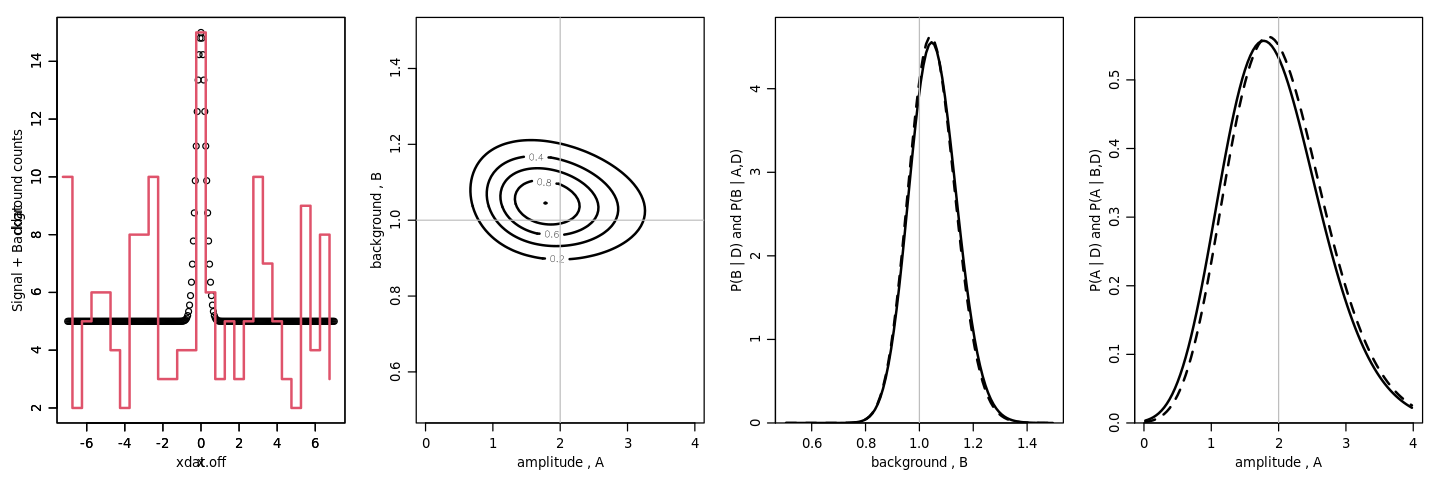

Resolution:  1 	Signal/noise ratio:  2 
a = 	 1.630189 +/- 0.3983222 
b = 	 1.111212 +/- 0.1020915 
rho = 	 -0.3968818 


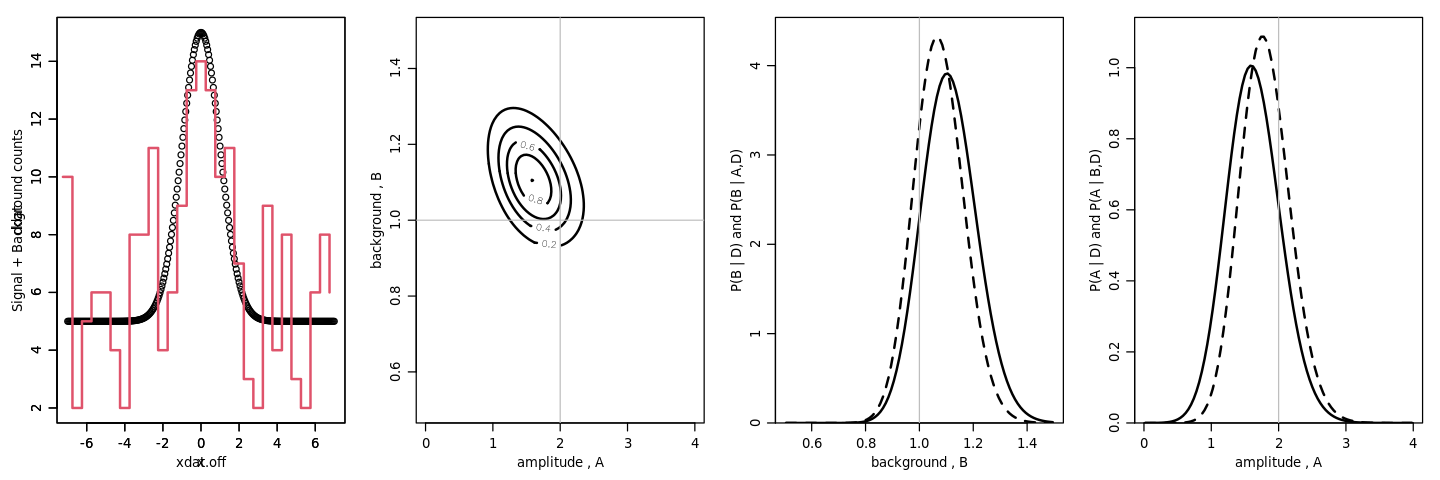

Resolution:  2 	Signal/noise ratio:  2 
a = 	 1.620327 +/- 0.3339856 
b = 	 1.121929 +/- 0.1294396 
rho = 	 -0.622968 


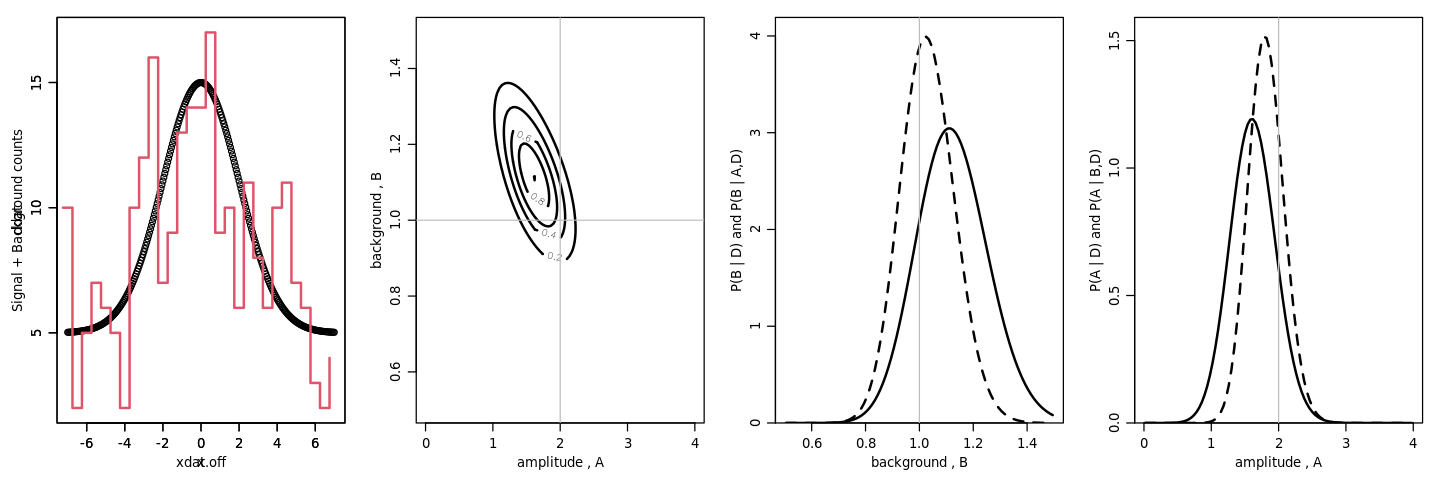

Resolution:  3 	Signal/noise ratio:  2 
a = 	 1.648756 +/- 0.3342847 
b = 	 1.172399 +/- 0.1662605 
rho = 	 -0.76452 


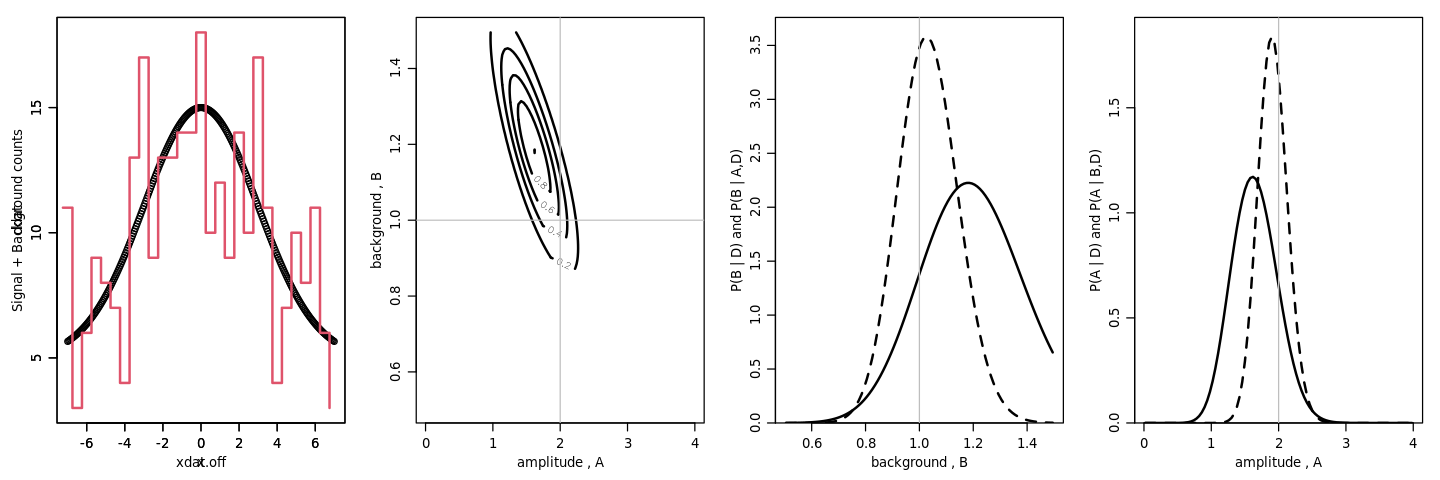

In [12]:
# Analysis of the resolution of the generated signal
for (w_res in w_resolutions){
    ratio <- 2
    par( mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    # Define model parameters
    x0 <- 0 #Signal peak
    A.true <- 2 #Signal amplitude
    w <- 1
    B.true <- A.true/ratio #Background amplitude
    Delta.t <- 5 #Exposure time

    # - Generate the observed data
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w_res, Delta.t)
    ddat <- rpois( length (s.true), s.true)

    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w_res, Delta.t)
    plot(xplot, splot, xlab="x", ylab=" Signal + Background counts ", xlim = range(xplot), ylim= range(c(splot , ddat )))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat , type="s",col=2,lwd=2,xlim=range ( xplot), ylim= range(c(splot , ddat )))

    # - Sampling grid for computing posterior
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2* Nsamp ), to=1-1/(2*Nsamp), by=1/ Nsamp )
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix (data=NA , nrow= length (a), ncol= length (b))
    for(j in 1: length (a)) {
        for(k in 1: length (b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour (a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="amplitude , A",
    ylab="background , B")
    abline (v=2,h=1,col="grey")

    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter . Normalize by gridding .
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true , x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")( ddat , xdat , A.true , b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i", ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)", type="l", lwd=2)
    lines (b, p_b_aD , lwd=2, lty=2)
    abline (v=B.true , col="grey")

    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)", type="l", lwd=2)
    lines (a, p_a_bD , lwd=2, lty=2)
    abline (v=A.true , col="grey")
    
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)

    sd_a <- sqrt( delta_a * sum ((a-mean_a)^2 * p_a_D) )
    sd_b <- sqrt( delta_b * sum ((b-mean_b)^2 * p_b_D) )

    # Covariance nurmalization is performed with ’brute force ’
    # The normalization constant is Z = delta_a* delta _b*sum(exp(z)).
    # This is independent of (a,b) so can be calculated outside of the loops .
    cov_ab <- 0
    for(j in 1: length (a)) {
    for(k in 1: length (b)) {
    cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)* exp(z[j,k])
    }
    }

    cov_ab <- cov_ab / sum(exp(z))
    rho_ab <- cov_ab / (sd_a * sd_b)
    mtext('Variable AB ratio', outer = TRUE, cex = 1.7)
    cat("Resolution: ", w_res, "\tSignal/noise ratio: ", ratio, "\n")
    cat("a = \t", mean_a, "+/-", sd_a, "\n")
    cat("b = \t", mean_b, "+/-", sd_b, "\n")
    cat("rho = \t", rho_ab , "\n")
}

Resolution:  1 	Signal/noise ratio:  1.5 
a = 	 1.759826 +/- 0.4104582 
b = 	 1.390771 +/- 0.07517917 
rho = 	 -0.2820907 


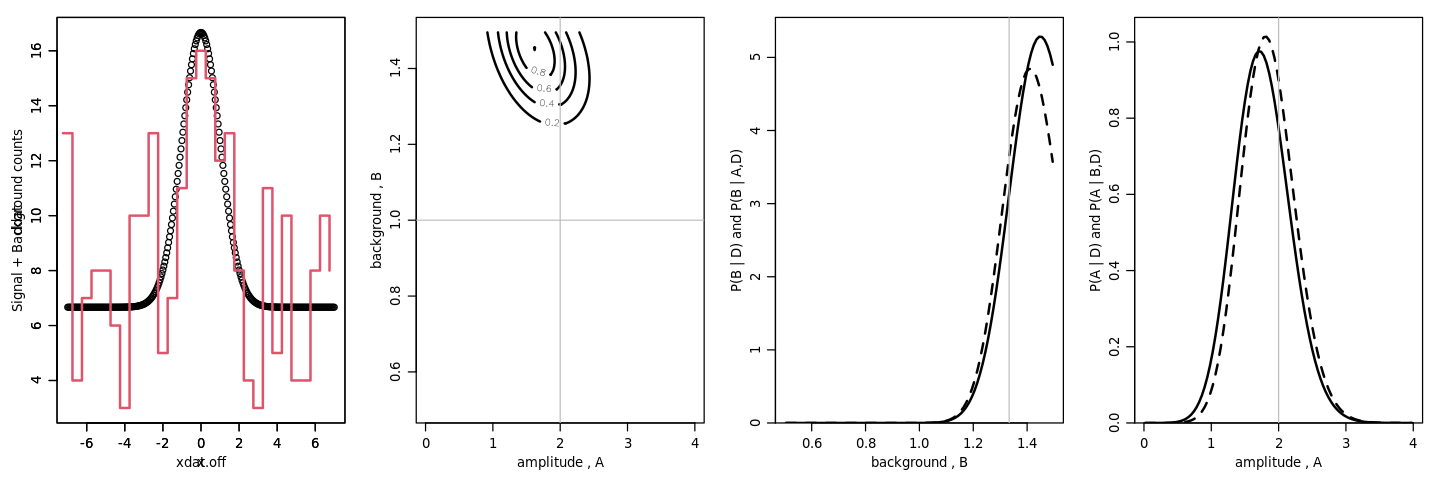

Resolution:  1 	Signal/noise ratio:  2 
a = 	 1.630189 +/- 0.3983222 
b = 	 1.111212 +/- 0.1020915 
rho = 	 -0.3968818 


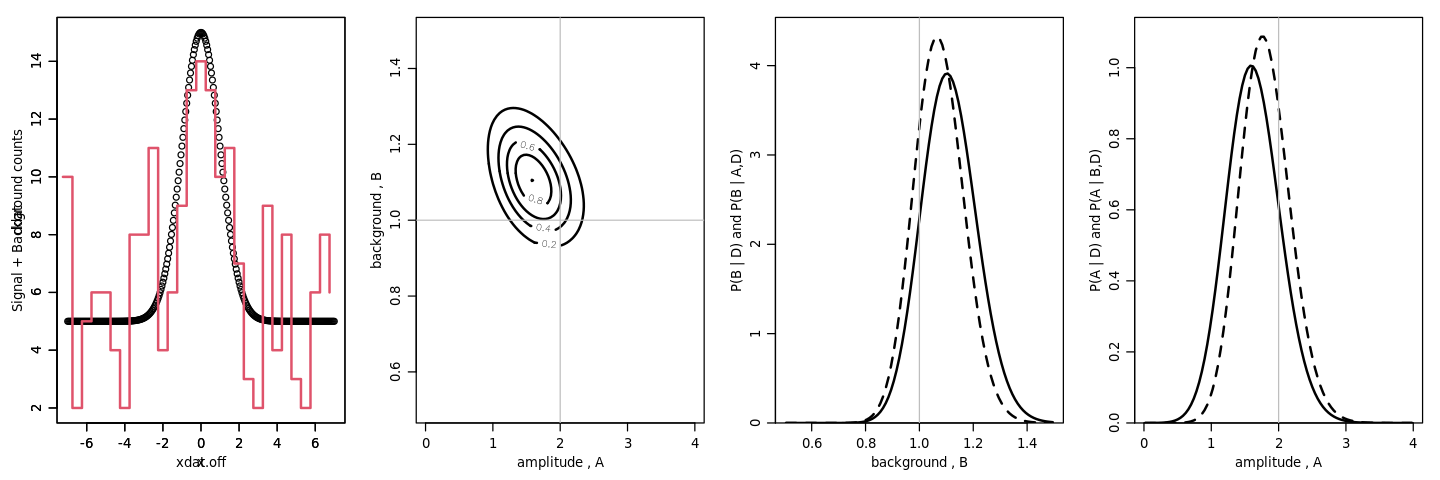

Resolution:  1 	Signal/noise ratio:  3 
a = 	 1.717087 +/- 0.3738452 
b = 	 0.7584078 +/- 0.08565215 
rho = 	 -0.3837018 


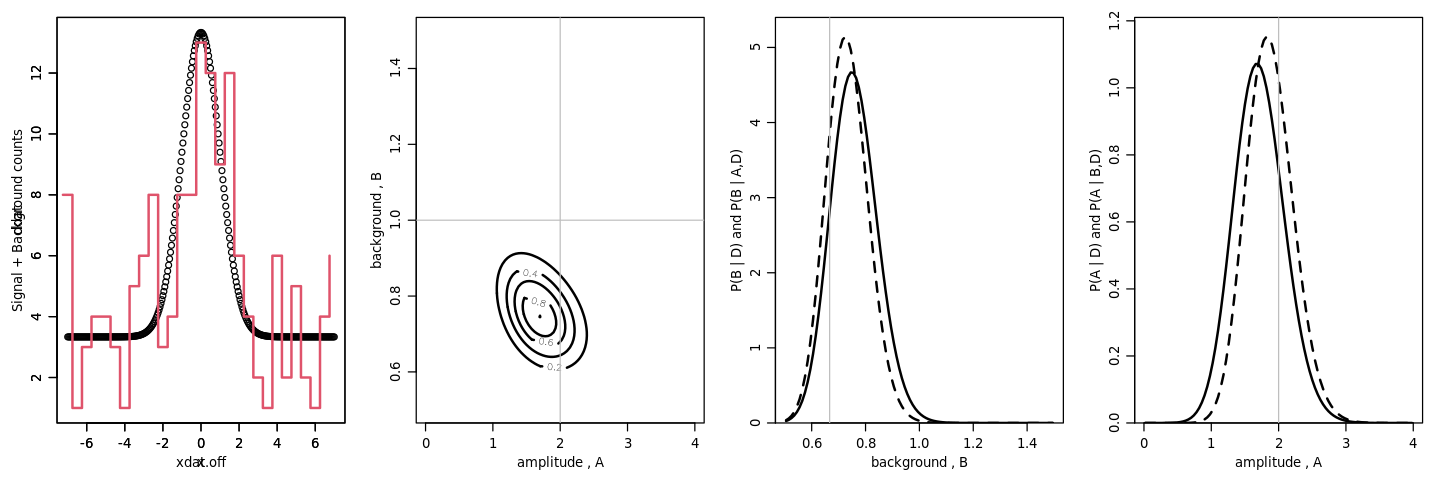

Resolution:  1 	Signal/noise ratio:  4 
a = 	 1.761053 +/- 0.3458178 
b = 	 0.5798007 +/- 0.05625861 
rho = 	 -0.2786332 


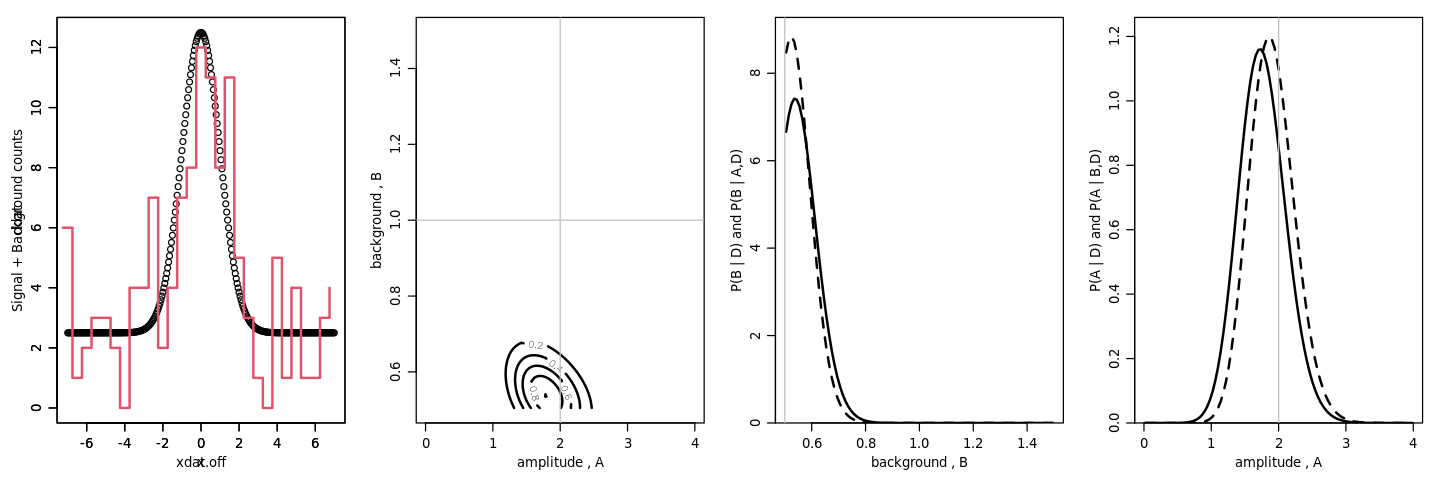

In [13]:
# Analysis of the signal/noise ratio
for (ratio in ratios){
    w_res <- 1
    par( mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    # Define model parameters
    x0 <- 0 #Signal peak
    A.true <- 2 #Signal amplitude
    w <- 1
    B.true <- A.true/ratio #Background amplitude
    Delta.t <- 5 #Exposure time

    # - Generate the observed data
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w_res, Delta.t)
    ddat <- rpois( length (s.true), s.true)

    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w_res, Delta.t)
    plot(xplot, splot, xlab="x", ylab=" Signal + Background counts ", xlim = range(xplot), ylim= range(c(splot , ddat )))
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat , type="s",col=2,lwd=2,xlim=range ( xplot), ylim= range(c(splot , ddat )))

    # - Sampling grid for computing posterior
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2* Nsamp ), to=1-1/(2*Nsamp), by=1/ Nsamp )
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix (data=NA , nrow= length (a), ncol= length (b))
    for(j in 1: length (a)) {
        for(k in 1: length (b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour (a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="amplitude , A",
    ylab="background , B")
    abline (v=2,h=1,col="grey")

    # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
    # by summing over other parameter . Normalize by gridding .
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true , x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")( ddat , xdat , A.true , b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i", ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)", type="l", lwd=2)
    lines (b, p_b_aD , lwd=2, lty=2)
    abline (v=B.true , col="grey")

    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)", type="l", lwd=2)
    lines (a, p_a_bD , lwd=2, lty=2)
    abline (v=A.true , col="grey")
    
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)

    sd_a <- sqrt( delta_a * sum ((a-mean_a)^2 * p_a_D) )
    sd_b <- sqrt( delta_b * sum ((b-mean_b)^2 * p_b_D) )

    # Covariance nurmalization is performed with ’brute force ’
    # The normalization constant is Z = delta_a* delta _b*sum(exp(z)).
    # This is independent of (a,b) so can be calculated outside of the loops .
    cov_ab <- 0
    for(j in 1: length (a)) {
    for(k in 1: length (b)) {
    cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)* exp(z[j,k])
    }
    }

    cov_ab <- cov_ab / sum(exp(z))
    rho_ab <- cov_ab / (sd_a * sd_b)
    mtext('Variable AB ratio', outer = TRUE, cex = 1.7)
    cat("Resolution: ", w_res, "\tSignal/noise ratio: ", ratio, "\n")
    cat("a = \t", mean_a, "+/-", sd_a, "\n")
    cat("b = \t", mean_b, "+/-", sd_b, "\n")
    cat("rho = \t", rho_ab , "\n")
}

Changing the resolution affects the signal and noise identification.

In case of great resolution, the values found for $A$ and $B$ are close to the true ones, while for incresing $w$ they are worsening.

A good resolution also reduces the anticorrelation for $A$ and $B$.

Incresing the signal/noise ratio improves the quality of the prediction of $A$.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52388efd-8841-4b4d-bf53-58bcfad8e1c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>